 Name : Devanshi Kevat  
 
 ROll NO: 18  
 
 Subject : Machine Learning  
 
 Course : MCA 2
 
 

# 1. Perform K-means with scratch and with library.

Initial Centroids
[[0.90041806 0.63310146]
 [0.29214465 0.36636184]
 [0.22879817 0.07697991]]
Final Centroids:
[[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]


C:\Users\devan\AppData\Local\Temp\ipykernel_40600\1138749661.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(np.unique(labels))))  # Use colormap for visual distinction


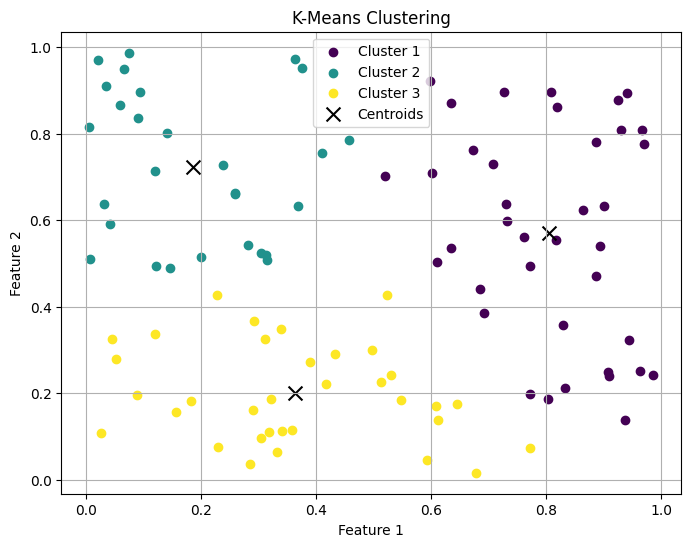

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum(np.square(point1 - point2)))

def kmeans(data, k, max_iter=100):
  
    n_samples, n_features = data.shape
    if not data.any():
        raise ValueError("Data cannot be empty for K-Means clustering.")

    
    k = min(k, n_samples)
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    print("Initial Centroids")
    print(centroids)

    history = []
    for _ in range(max_iter):
        history.append(centroids.copy())

        # Assign data points to closest centroids using Euclidean distance
        distances = np.array([euclidean_distance(point, centroid) 
                              for point in data for centroid in centroids])
        distances = distances.reshape(n_samples, -1)
        labels = np.argmin(distances, axis=1)

        # Update centroids as the mean of points in each cluster
        for i in range(k):
            cluster_data = data[labels == i]
            if cluster_data.shape[0] > 0:  # Check for empty clusters
                centroids[i] = np.mean(cluster_data, axis=0)

        # Check for convergence (consider actual number of iterations)
        if len(history) > 1 and np.all(np.equal(centroids, history[-1])):  # Consider previous iteration
            break

    return centroids, labels, history

def plot_clusters(data, labels, centroids):
  
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(np.unique(labels))))  # Use colormap for visual distinction
    for i in range(len(np.unique(labels))):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)  # Add grid lines for better visualization
    plt.show()

# Example usage
np.random.seed(42)
data = np.random.rand(100, 2)

# Create a KMeans object with k=3 clusters and max_iter=50
try:
    kmeans_obj = kmeans(data, k=3, max_iter=50)
except ValueError as e:
    print(e)
else:
    # Get the centroids, labels, and history
    centroids, labels, history = kmeans_obj

    # Print the final centroids
    print("Final Centroids:")
    print(centroids)

    # Plot the clusters
    plot_clusters(data, labels, centroids)


# With Library

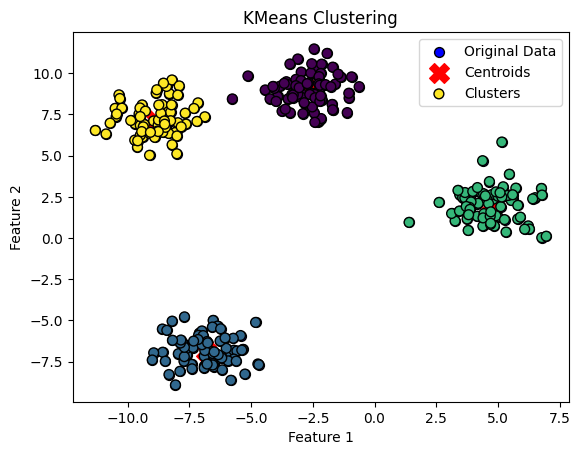

Centroids:
 [[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]

Predictions for new data points:
Data Point 1: Cluster 2
Data Point 2: Cluster 2
Data Point 3: Cluster 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Plot the original dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50, label='Original Data')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o', edgecolor='k', s=50, cmap='viridis', label='Clusters')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print centroids
print('Centroids:\n', kmeans.cluster_centers_)

# Make predictions for new data points
new_data_points = np.array([[0, 2], [3, 5], [6, 8]])
predictions = kmeans.predict(new_data_points)

print('\nPredictions for new data points:')
for i, point in enumerate(new_data_points):
    print(f'Data Point {i+1}: Cluster {predictions[i]}')


# 2. Perform Fuzzy c means with scratch and with library.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from fcmeans import FCM

C:\Users\devan\AppData\Local\Temp\ipykernel_40600\1998581584.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
iris=load_iris()

In [5]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.DataFrame(iris.target,columns=['Species'])

In [6]:
x.head()
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [7]:
fcm=FCM(n_cluster=3)
fcm.fit(x.values)
fcm_centers=fcm.centers
fcm_labels=fcm.predict(x.values)
fcm_centers=pd.DataFrame(fcm_centers)

In [8]:
fcm_centers

,0,1,2,3
0,5.248489,3.675338,1.508771,0.277793
1,5.670032,2.673208,4.072484,1.257758
2,4.751418,3.148193,1.443872,0.215264
3,6.263793,2.886099,4.939050,1.712244
4,7.014160,3.104638,5.903299,2.118939


In [9]:
fcm_labels

array([0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 4, 1, 4, 4, 4,
       3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3], dtype=int64)

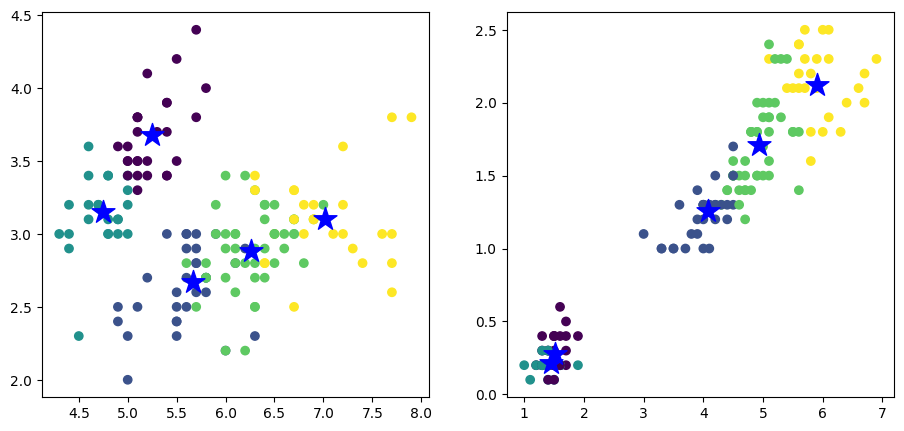

In [10]:
f,axes=plt.subplots(1,2,figsize=(11,5))
axes[0].scatter(list(x.iloc[:,0]),list(x.iloc[:,1]),c=fcm_labels)
axes[1].scatter(list(x.iloc[:,2]),list(x.iloc[:,3]),c=fcm_labels)
axes[0].scatter(fcm_centers[0],fcm_centers[1],s=300,marker='*',c='b')
axes[1].scatter(fcm_centers[2],fcm_centers[3],s=300,marker='*',c='b')

# without library

In [11]:
import numpy as np
import pandas as pd
import random
import operator
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings('ignore')

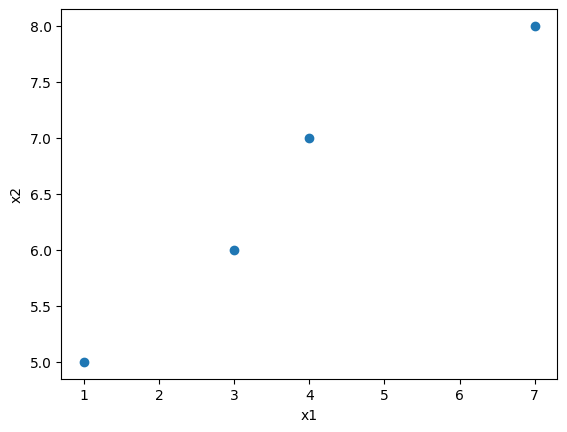

In [12]:
x1=[1,3,4,7]
x2=[5,6,7,8]
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1,x2)
plt.show()

In [13]:
df=pd.DataFrame(list(zip(x1,x2)),columns=['x1','x2'])
df

,x1,x2
0,1,5
1,3,6
2,4,7
3,7,8


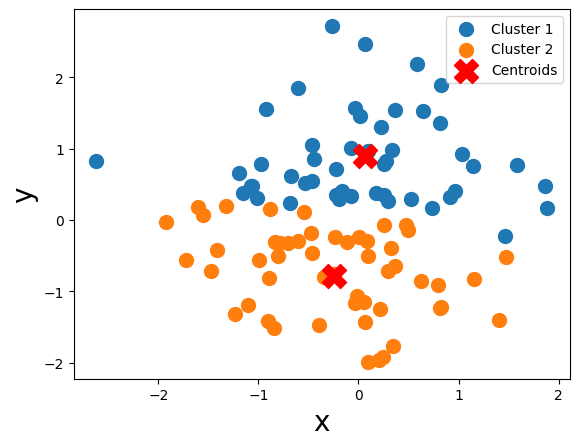

(array([[3.74811913e-01, 6.25188087e-01],
        [9.85835718e-01, 1.41642819e-02],
        [4.61811351e-02, 9.53818865e-01],
        [8.61627040e-01, 1.38372960e-01],
        [9.50185111e-01, 4.98148888e-02],
        [4.76283340e-03, 9.95237167e-01],
        [3.56196864e-02, 9.64380314e-01],
        [1.49567373e-01, 8.50432627e-01],
        [5.85560209e-01, 4.14439791e-01],
        [1.75463886e-02, 9.82453611e-01],
        [5.05546697e-01, 4.94453303e-01],
        [9.00262002e-03, 9.90997380e-01],
        [4.45782561e-01, 5.54217439e-01],
        [6.01793002e-01, 3.98206998e-01],
        [3.76450560e-02, 9.62354944e-01],
        [9.63649672e-01, 3.63503280e-02],
        [1.16380152e-03, 9.98836198e-01],
        [6.55598812e-02, 9.34440119e-01],
        [3.68373839e-02, 9.63162616e-01],
        [4.33010957e-01, 5.66989043e-01],
        [7.89749008e-01, 2.10250992e-01],
        [2.79552256e-02, 9.72044774e-01],
        [8.52467557e-02, 9.14753244e-01],
        [9.91978247e-01, 8.0217529

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_membership_weights(n, k):
    return np.random.dirichlet(np.ones(k), size=n)

def compute_centroids(data, weight_arr, m):
    centroids = []
    for i in range(k):
        weight_sum = np.sum(np.power(weight_arr[:, i], m))
        centroid = np.sum(data * np.power(weight_arr[:, i], m)[:, np.newaxis], axis=0) / weight_sum
        centroids.append(centroid)
    return np.array(centroids)

def update_membership_weights(data, centroids, m):
    dist_to_centroids = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2) ** 2
    with np.errstate(divide='ignore'):  # Handle division by zero
        membership_weights = 1 / dist_to_centroids
    membership_weights **= 2 / (m - 1)
    return membership_weights / np.sum(membership_weights, axis=1, keepdims=True)

def plot_clusters(data, centroids, membership_weights):
    cluster_assignments = np.argmax(membership_weights, axis=1)
    for cluster in range(k):
        cluster_data = data[cluster_assignments == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=100, marker='o', label=f'Cluster {cluster + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='X', color='r', label='Centroids')
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.legend()
    plt.show()

def fuzzy_c_means(data, k, m, max_iters):
    n = len(data)
    membership_weights = initialize_membership_weights(n, k)
    
    for _ in range(max_iters):
        centroids = compute_centroids(data, membership_weights, m)
        membership_weights = update_membership_weights(data, centroids, m)
    
    plot_clusters(data, centroids, membership_weights)
    return membership_weights, centroids

# Example usage
np.random.seed(42)
n = 100
k = 2
d = 2
m = 2
max_iters = 12

# Generate random data
df = pd.DataFrame(np.random.randn(n, d), columns=['x', 'y'])

# Perform Fuzzy C-Means clustering
fuzzy_c_means(df.values, k, m, max_iters)
